In [1]:
import numpy as np
import scipy.io as spio
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadMuscle():
    """
    Loading the different files and storing them in a dictionnary
    """
    
    
    HandX = spio.loadmat("dataMuscle/HandX.mat")
    HandXVel = spio.loadmat("dataMuscle/HandXVel.mat")
    HandXForce = spio.loadmat("dataMuscle/HandXForce.mat")
    
    HandY = spio.loadmat("dataMuscle/HandY.mat")
    HandYVel = spio.loadmat("dataMuscle/HandYVel.mat")
    HandYForce = spio.loadmat("dataMuscle/HandYForce.mat")
    
    Pectoralis = spio.loadmat("dataMuscle/Pectoralis.mat")
    Deltoid = spio.loadmat("dataMuscle/Deltoid.mat")
    
    extracted = spio.loadmat("dataMuscle/extracted.mat")
    descriptions = spio.loadmat("dataMuscle/descriptions.mat")
    
    
    """ 
    Creation of the first dictionnary - strMuscles
    """
    
    dictMuscles = {"HandX": HandX["HandX"],
                  "HandXVel": HandXVel["HandXVel"],
                  "HandXForce": HandXForce["HandXForce"],
                  "HandY": HandY["HandY"],
                  "HandYVel": HandYVel["HandYVel"],
                  "HandYForce": HandYForce["HandYForce"],
                  "Pectoralis": Pectoralis["Pectoralis"],
                  "Deltoid": Deltoid["Deltoid"],
                  "extracted": extracted["extracted"],
                  "descriptions": descriptions["descriptions"]}

    return dictMuscles

In [3]:
def loadNeuron():
    
    namesSignals= [
        ('time'    ),
        ('shoang'  ),
        ('elbang'  ),
        ('handxpos'),
        ('handypos'),
        ('cells'   )]
    
    dictNeurons = {}
    for targetNum in range(1,9):
            
        target = {}
            
        for trialNum in range(1,7):
            trial = {}
            for nam in namesSignals:
                key = nam
                value = spio.loadmat('dataNeuron/target'+str(targetNum)+'trial' + str(trialNum) + 'signals'+nam+'.mat')
                trial[key]=value['a']
                
            target['trial'+str(trialNum)] = trial
    
        dictNeurons['target'+str(targetNum)] = target
        
    return dictNeurons

In [4]:
def rect_kernel(t_range,width):
    """
    rect_kernel creates the rectangular kernel used to compute the firing rate

    Inputs :
    -t_range is the time span on which we want to define this kernel
    -width is the width of the rectangular kernel (in the same units as dt)

    Outputs :
    -kernel is the returned rectangular kernel
    """
    dt = t_range[1]-t_range[0]
    #print('dt: ',dt)
    n_width = int(width//dt)
    #print(n_width)
    kernel = np.zeros(len(t_range))
    centre = int(len(t_range)//2)
    for i in range(centre-int(n_width//2), centre+int(n_width//2)) :
      kernel[i] = 1/dt
    #print(len(kernel))
    return kernel

In [5]:
def firing_rate(cells,kernel):
    """
    firing rate is a function that computes the firing rate from the spike trains and a given kernel

    Inputs :
    -cells (numpy array) is the spike train we want to compute the firing rate for
    -kernel (numpy array) is the kernel used for the convolution

    Outputs :
    -firing rate (numpy array) is the resulting firing rate
    """

    firing_rate = np.convolve(cells, kernel, 'same')

    return firing_rate

In [6]:
dictMuscles = loadMuscle()
dictNeurons = loadNeuron()

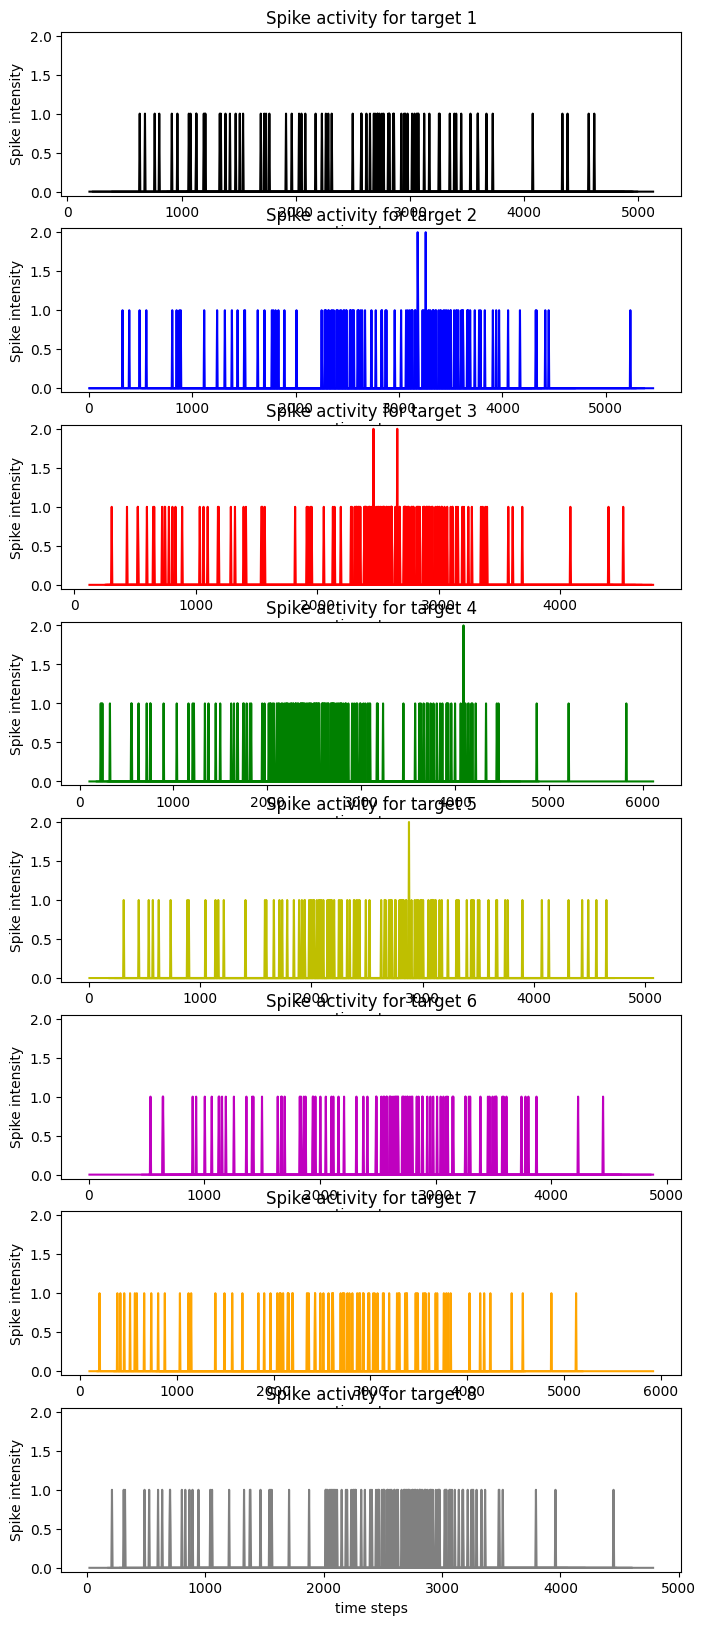

In [7]:
# Plotting neural spikes for each trial to the first target
frequency = 200 # Hz - frequency of acquisition
T = 1/frequency # s - period of acquisition

colors = ['k','b','r','g','y','m','orange','grey']

fig, axs = plt.subplots(8, figsize=(8, 20))
for target_number in range(1,9) :
    for trial_number in range(1,7) :
        cells = dictNeurons['target'+str(target_number)]['trial'+str(trial_number)]['cells']
        # figure
        x_axis = dictNeurons['target'+str(target_number)]['trial'+str(trial_number)]['time']
        axs[target_number-1].plot(x_axis,cells,color=colors[target_number-1])
        axs[target_number-1].set_ylim([-0.05,2.05])
        axs[target_number-1].set_title('Spike activity for target '+str(target_number))
        axs[target_number-1].set_xlabel('time steps')
        axs[target_number-1].set_ylabel('Spike intensity')
plt.show()

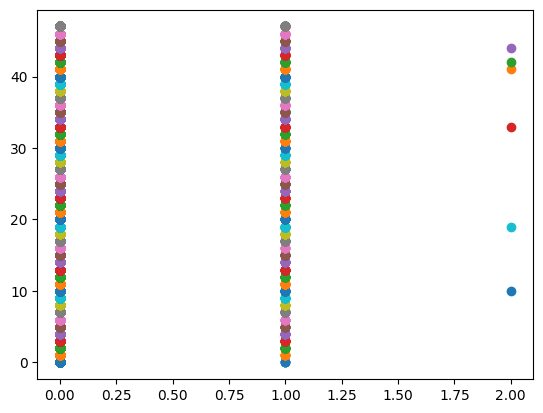

In [8]:
# Raster plot
fig = plt.subplots()
cells_all = []
for trial_number in range(1,7) :
    for target in range(1,9) :
        cells = np.array(dictNeurons['target'+str(target)]['trial'+str(trial_number)]['cells'])
        cells_all.append(cells)

for i in range(0,len(cells_all)) :   
    plt.scatter(cells_all[i],(i)*np.ones((1,len(cells_all[i]))))
    
        
plt.show()

C:\Users\afons\AppData\Local\Temp\ipykernel_12800\3015661948.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('starting time: ', float(start_time),' seconds')
C:\Users\afons\AppData\Local\Temp\ipykernel_12800\3015661948.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ending time: ', float(end_time),' seconds')
C:\Users\afons\AppData\Local\Temp\ipykernel_12800\3015661948.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('duration: ',float

starting time:  0.965  seconds
ending time:  21.69  seconds
duration:  20.725  seconds


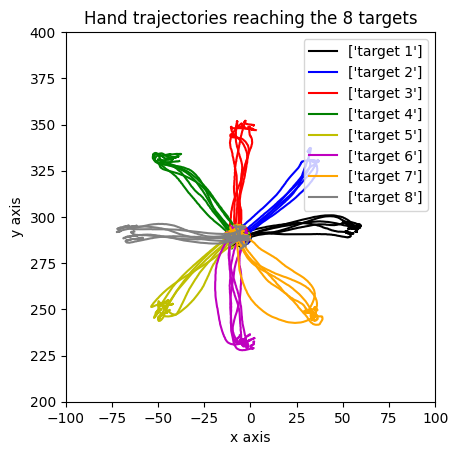

In [9]:
#%% To find the total duration for one movement: 
#print(len(dictNeurons['target1']['trial1']['time']))
start_time = dictNeurons['target1']['trial1']['time'][0]*T
print('starting time: ', float(start_time),' seconds')
end_time = dictNeurons['target1']['trial1']['time'][-1]*T
print('ending time: ', float(end_time),' seconds')
duration = end_time-start_time
print('duration: ',float(duration),' seconds')


#%% 

# Plot hand trajectiories for each target end every trial
fig, ax = plt.subplots()
colors = ['k','b','r','g','y','m','orange','grey']
for target in range(1,9) :
    for trial_number in range(1,7) :
        handxpos = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['handxpos']
        handypos = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['handypos']
        # figure
        if trial_number == 1 :
            plt.plot(handxpos,handypos,color=colors[target-1],label=['target '+str(target)])
        if trial_number != 1 :
            plt.plot(handxpos,handypos,color=colors[target-1])
        ax.set_aspect('equal', 'box')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim([-100,100])
plt.ylim([200,400])
plt.legend()
plt.title('Hand trajectories reaching the 8 targets')
plt.show()

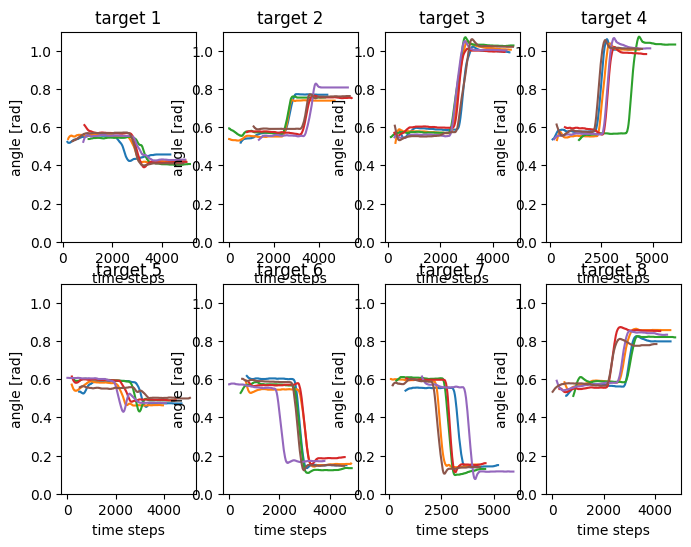

Text(0.5, 1.0, 'ZOOM - target 1 - shoulder angles')

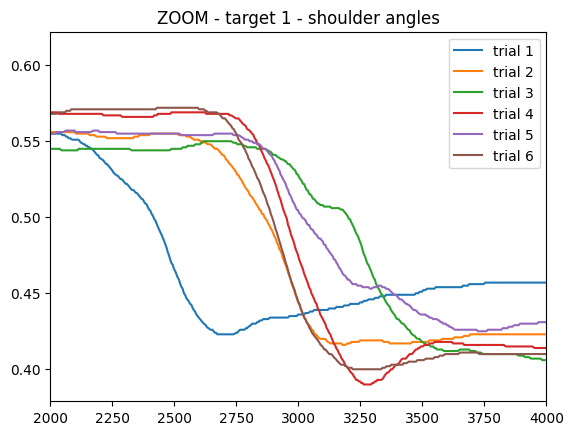

In [10]:
# Plot shoulder angles for every trial
fig, axs = plt.subplots(2,4,figsize=(8, 6))
count = -1
for target in range(1,9) :
    count += 1
    for trial_number in range(1,7) :
        shoulder_angle = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['shoang']
        time = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['time']
        # figure
        axs[count//4][count%4].plot(time,shoulder_angle)
        axs[count//4][count%4].set_xlabel('time steps')
        axs[count//4][count%4].set_ylabel('angle [rad]')
        axs[count//4][count%4].set_ylim([0,1.1])
    axs[count//4][count%4].set_title('target '+str(target))
plt.show()

fig = plt.subplots()
for trial_number in range(1,7) :
    shoulder_angle = dictNeurons['target1']['trial'+str(trial_number)]['shoang']
    time = dictNeurons['target1']['trial'+str(trial_number)]['time']
    # figure
    plt.plot(time,shoulder_angle,label='trial '+str(trial_number))
    plt.xlim([2000,4000])
plt.legend()
plt.title('ZOOM - target 1 - shoulder angles')

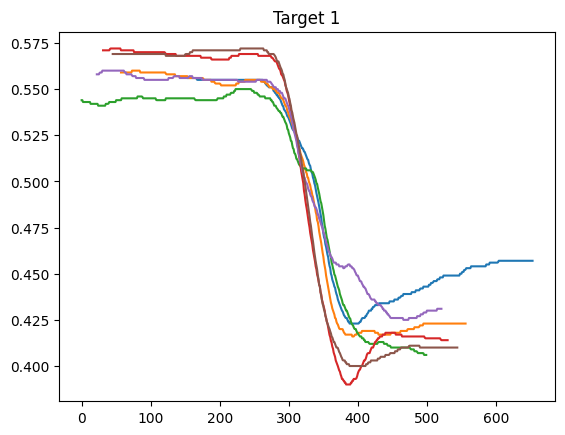

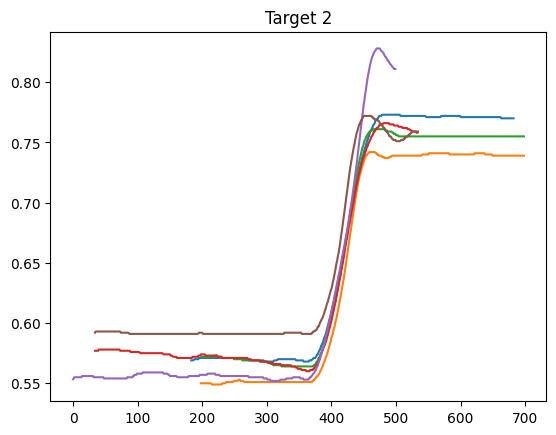

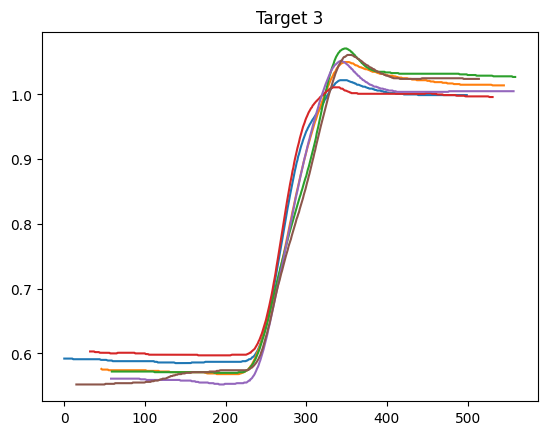

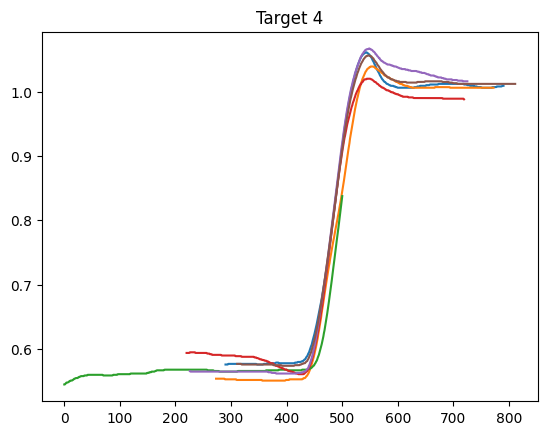

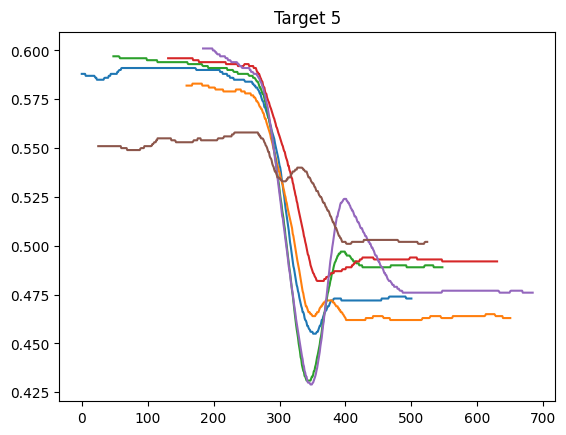

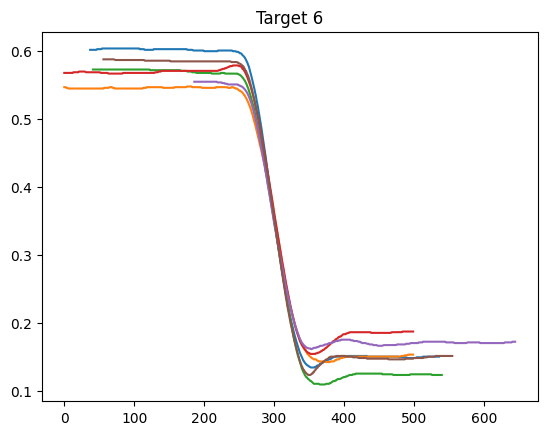

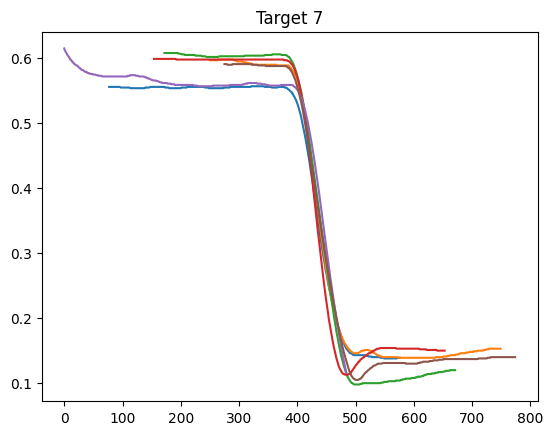

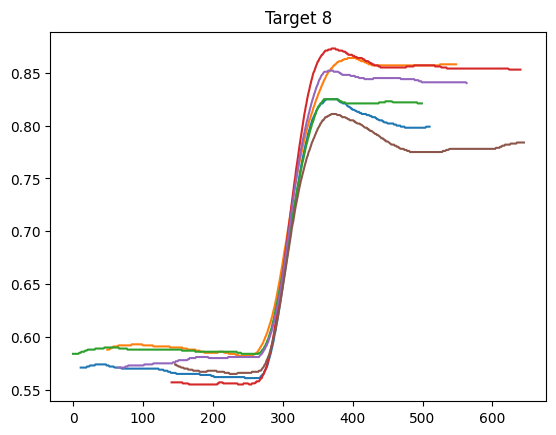

In [11]:
# Define the threshold for determining the drop/spike
threshold = 0.2

# Define the time range you want to capture for each target
desired_start_time = 1500  # Adjust as needed
desired_end_time = 4000    # Adjust as needed

number_of_targets = 8  # Assuming there are 8 targets

shifts_mat = np.zeros((8,6))

# Iterate through each target
for target_number in range(1, number_of_targets + 1):
    target_key = 'target' + str(target_number)
    reference_points = []  # Store the reference drop/spike points

    # Find the equivalent of "2000" and "4000" for each target
    for trial_number in range(1, 7):
        time = dictNeurons[target_key]['trial' + str(trial_number)]['time']
        ind1 = np.where(time >= desired_start_time)[0][0]
        ind2 = np.where(time <= desired_end_time)[0][-1]

        shoang = dictNeurons[target_key]['trial' + str(trial_number)]['shoang']
        shoang_processed = shoang[ind1:ind2 + 1]

        # Detecting trend (increase or decrease)
        mean_initial = np.mean(shoang_processed[:10])  # First 10 points
        mean_final = np.mean(shoang_processed[-10:])  # Last 10 points

        # Determine the drop or spike point for each curve
        if mean_final < mean_initial:  # Trend is decreasing
            shoang_range = np.max(shoang_processed) - np.min(shoang_processed)
            threshold_value = np.max(shoang_processed) - threshold * shoang_range
            reference_point = np.where(shoang_processed < threshold_value)[0][0]
        else:  # Trend is increasing
            shoang_range = np.max(shoang_processed) - np.min(shoang_processed)
            threshold_value = np.min(shoang_processed) + threshold * shoang_range
            reference_point = np.where(shoang_processed > threshold_value)[0][0]

        reference_points.append(reference_point)

    # Find the reference point for this target
    reference_point = max(reference_points)

    # Create a new figure for each target
    fig, ax = plt.subplots()
    ax.set_title(f'Target {target_number}')

    # Plot each trial for this target
    for trial_number in range(1, 7):
        shoang = dictNeurons[target_key]['trial' + str(trial_number)]['shoang']
        time = dictNeurons[target_key]['trial' + str(trial_number)]['time']

        ind1 = np.where(time >= desired_start_time)[0][0]
        ind2 = np.where(time <= desired_end_time)[0][-1]
        shoang_processed = shoang[ind1:ind2 + 1]

        # Calculate the shift for the time axis
        shift = reference_point - reference_points[trial_number - 1]
        
        shifts_mat[target_number-1,trial_number-1] = shift
        
        # Apply the shift
        time_shifted = np.arange(len(shoang_processed)) + shift

        # Plot
        ax.plot(time_shifted, shoang_processed)

    plt.show()


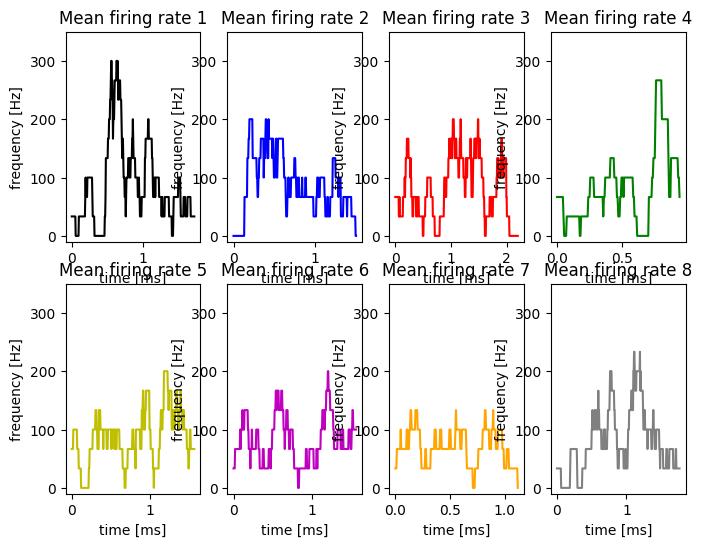

In [12]:
colors = ['k','b','r','g','y','m','orange','grey']

fig, axs = plt.subplots(2,4,figsize=(8, 6))
count = -1
mean_firing_rates = []
for target_number in range(1,9) :
    count += 1
    
    max_shift = np.max(shifts_mat[target_number-1,:])
    firing_rates = []
    min_len = np.inf  # Initialize min_len to positive infinity

    # Find the minimum length among all cells_processed arrays
    for trial_number in range(1, 7):
        cells = np.array(dictNeurons['target1']['trial' + str(trial_number)]['cells'])
        time = dictNeurons['target1']['trial' + str(trial_number)]['time']
        ind1 = np.where(time > 1500)[0][0]
        ind2 = np.where(time > 4000)[0][0]
        cells_processed = cells[ind1:ind2]
        tot_len = len(cells_processed)
        len_processed = tot_len - int(max_shift - shifts_mat[target_number-1,trial_number-1])

        # Update min_len if necessary
        if len_processed < min_len:
            min_len = len_processed

    # Trim all cells_processed arrays to have the same minimum length
    for trial_number in range(1, 7):
        cells = np.array(dictNeurons['target1']['trial' + str(trial_number)]['cells'])
        time = dictNeurons['target1']['trial' + str(trial_number)]['time']
        ind1 = np.where(time > 1500)[0][0]
        ind2 = np.where(time > 4000)[0][0]
        cells_processed = cells[ind1:ind2]
        tot_len = len(cells_processed)
        start_idx = int(max_shift - shifts_mat[target_number-1,trial_number-1])
        end_idx = int(start_idx + min_len)
        cells_processed = cells_processed[start_idx:end_idx]

        t_range = np.arange(0, len(cells_processed) * T, T)  # maximum time duration
        kernel = rect_kernel(t_range, 100e-3)  # width = 0.1 [s] = 20 time steps
        f_rate = firing_rate(cells_processed[:,0], kernel)
        firing_rates.append(f_rate)

    firing_rates = np.array(firing_rates).reshape(6,min_len)

    # Plot the averaged firing rate
    mean_firing_rates.append(np.mean(firing_rates, 0))
    x_axis = np.arange(0,min_len*T,T)
    axs[count//4][count%4].plot(x_axis,mean_firing_rates[target_number-1],color=colors[target_number-1],label='target '+str(target_number))
    axs[count//4][count%4].set_xlabel('time [ms]')
    axs[count//4][count%4].set_ylabel('frequency [Hz]')
    axs[count//4][count%4].set_ylim([-10,350])
    axs[count//4][count%4].set_title('Mean firing rate '+str(target_number))


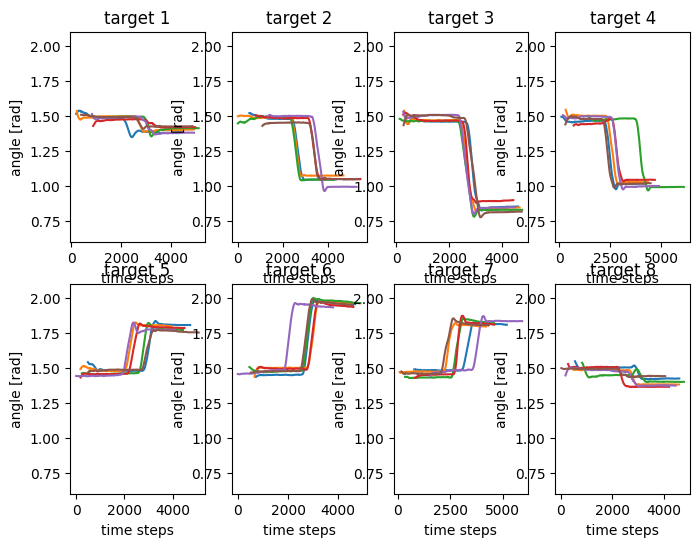

In [13]:
# Plot elbow angles for every trial
fig, axs = plt.subplots(2,4,figsize=(8, 6))
count = -1
for target in range(1,9) :
    count += 1
    for trial_number in range(1,7) :
        elbow_angle = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['elbang']
        time = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['time']
        # figure
        axs[count//4][count%4].plot(time,elbow_angle)
        axs[count//4][count%4].set_xlabel('time steps')
        axs[count//4][count%4].set_ylabel('angle [rad]')
        axs[count//4][count%4].set_ylim([0.6,2.1])
    axs[count//4][count%4].set_title('target '+str(target))
plt.show()



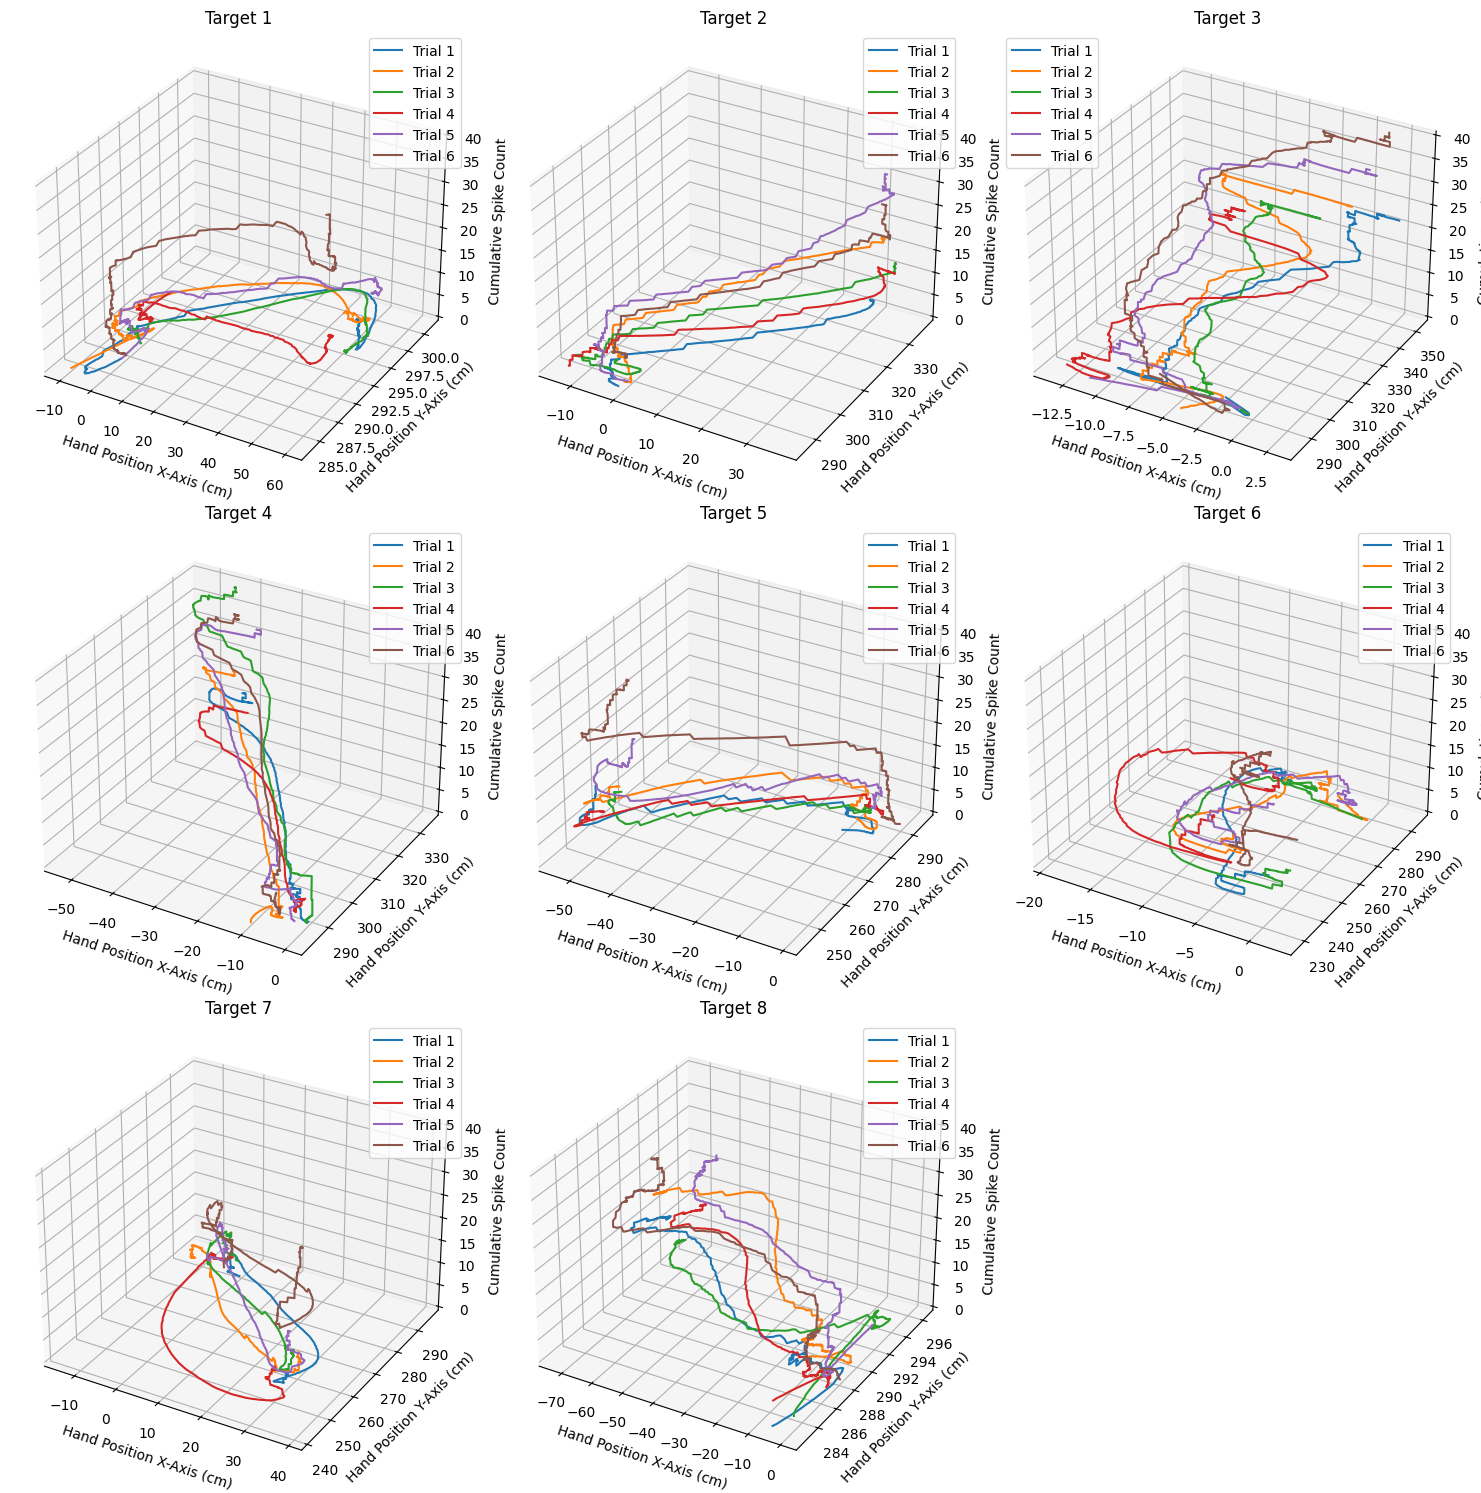

In [14]:

# Assuming dictNeurons is your dictionary
# dictNeurons = {}  # Replace this with your actual dictionary

fig = plt.figure(figsize=(15, 15))

# Loop through each target
for i in range(1, 9):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.set_title(f"Target {i}")

    # Loop through each trial for the target
    for j in range(1, 7):
        # data = dictNeurons['target' + str(i)]['trial' + str(j)]
        shoang = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['shoang'])
        handxpos = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['handxpos'])
        elbang = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['elbang'])
        handypos = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['handypos'])
        cells = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['cells'])

        # Assuming cells is a list of lists of 0s and 1s, one list per timestep
        spike_counts = np.cumsum([np.sum(timestep) for timestep in cells])
        spike_counts = np.reshape(spike_counts, (len(spike_counts), 1))
        # print(spike_counts)# Check if lengths of shoang, elbang, and spike_counts are the same
        # print(shoang.shape, elbang.shape, spike_counts.shape)
        if len(shoang) == len(elbang) == len(spike_counts):
            ax.plot(handxpos, handypos, spike_counts, label=f'Trial {j}')
        else:
            print(f"Length mismatch in Target {i} Trial {j}")

    ax.legend()
    ax.set_zlim(0, 40)
    # ax.set_ylim(200, 360)
    ax.set_xlabel('Hand Position X-Axis (cm)')
    ax.set_ylabel('Hand Position Y-Axis (cm)')
    ax.set_zlabel('Cumulative Spike Count')

plt.tight_layout()
plt.show()


In [15]:

##########################
# Plot velocity on y and computed Fx applied by the robot
# The force given is the reaction of the patient to the exernal perturbation, so is slightly different and has components on x and y
#
#
#
#
#########################


list_musc = dictMuscles.keys()
print(list_musc)

dict_keys(['HandX', 'HandXVel', 'HandXForce', 'HandY', 'HandYVel', 'HandYForce', 'Pectoralis', 'Deltoid', 'extracted', 'descriptions'])


[[ 0.00764325  0.00630243  0.00496169 ...  0.71829657  0.71604813
   0.71415402]
 [ 0.08749781  0.08083573  0.07429828 ...  0.93544697  0.93325688
   0.93083382]
 [ 0.11362253  0.11105635  0.10856677 ...  0.68963489  0.69528452
   0.70036828]
 ...
 [ 0.06420716  0.06321249  0.06261698 ...  1.3929284   1.39342393
   1.39313372]
 [-0.0812     -0.07511325 -0.06912996 ...  0.93668128  0.939507
   0.94231066]
 [-0.0585741  -0.05568971 -0.0530198  ...  0.50820312  0.50912784
   0.51005842]]
[[array(['Trial Number'], dtype='<U12') array(['Sequence'], dtype='<U8')
  array(['Type'], dtype='<U4') array(['Count'], dtype='<U5')
  array(['Reaction Time'], dtype='<U13')]]
[[  1   1   1   1 360]
 [  2   2   1   2 322]
 [  3   3   1   3 420]
 ...
 [ 58  30   3   3 306]
 [ 59  48   3   4 325]
 [ 60  58   3   5 337]]
360
x rows:  360
x columns:  1200


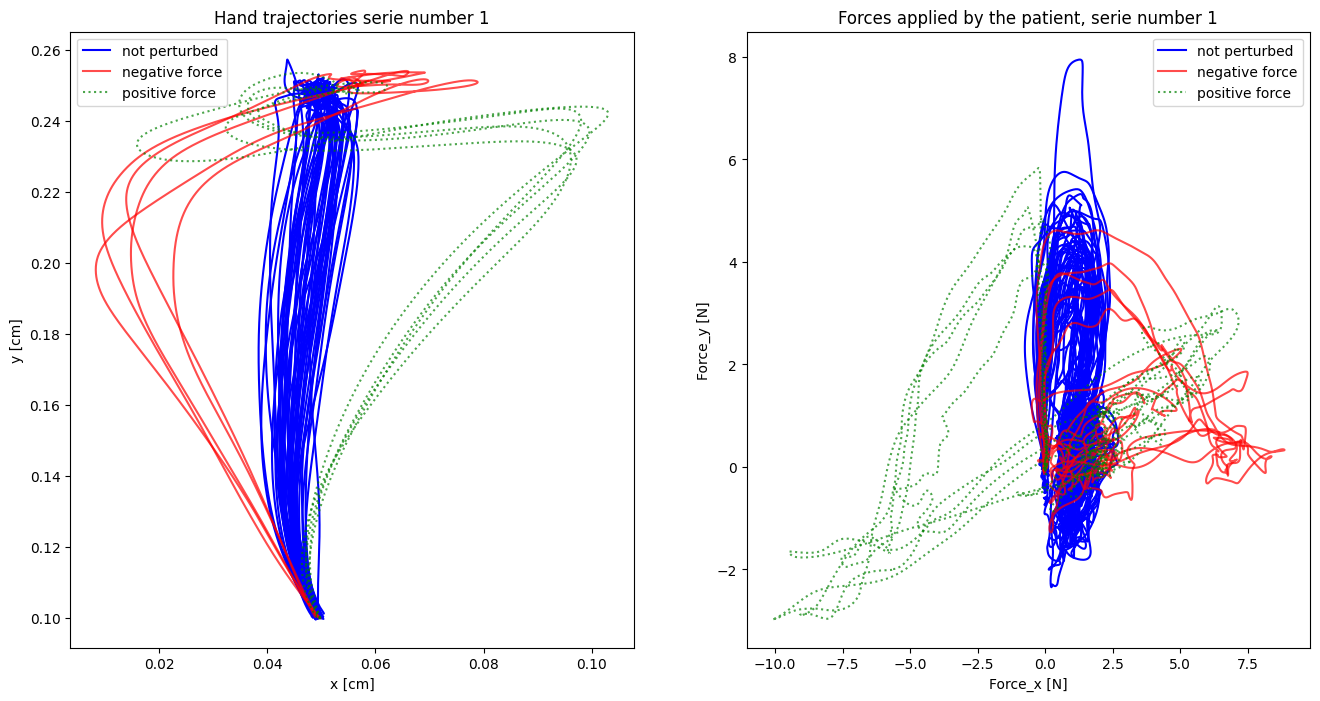

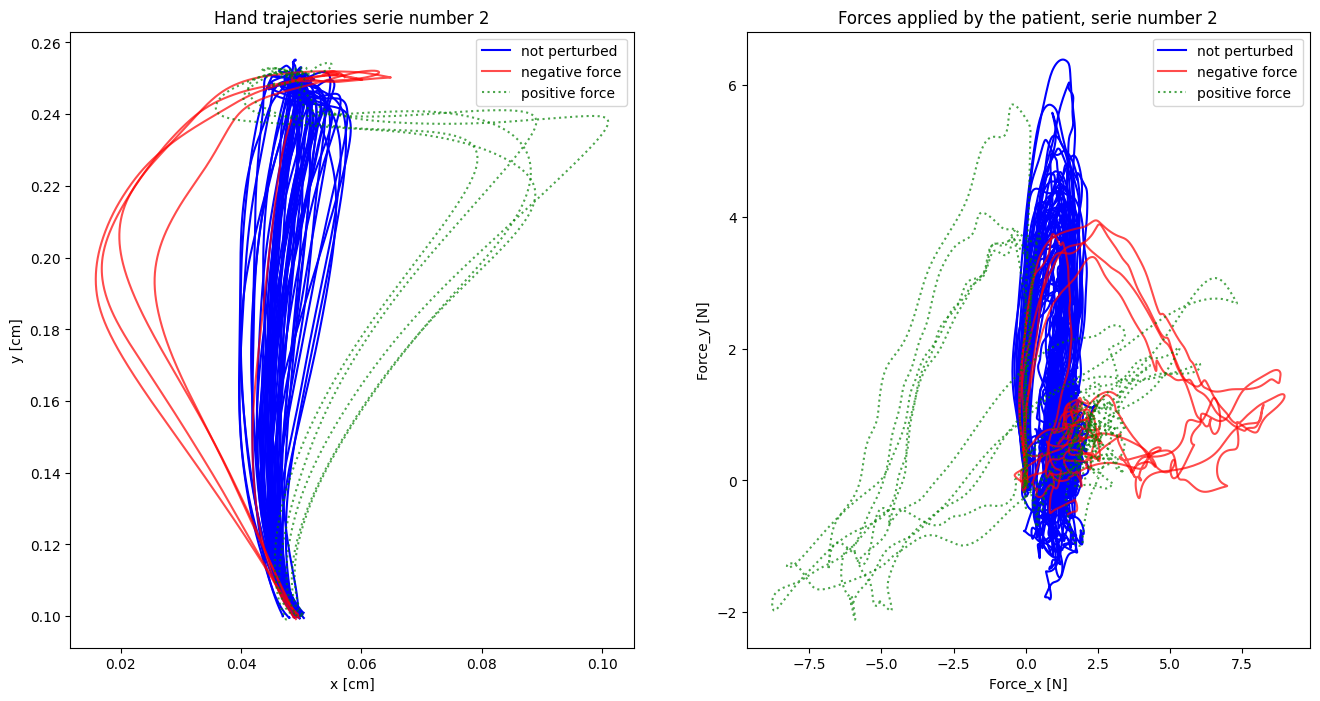

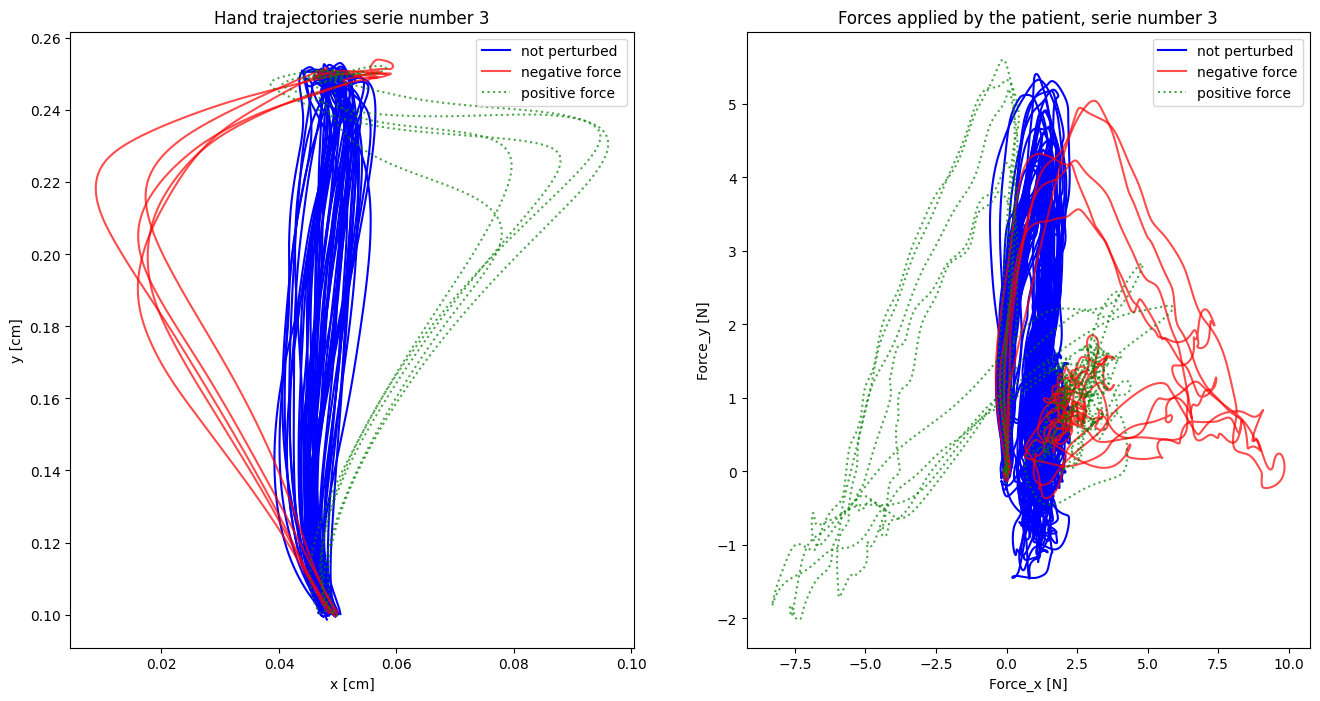

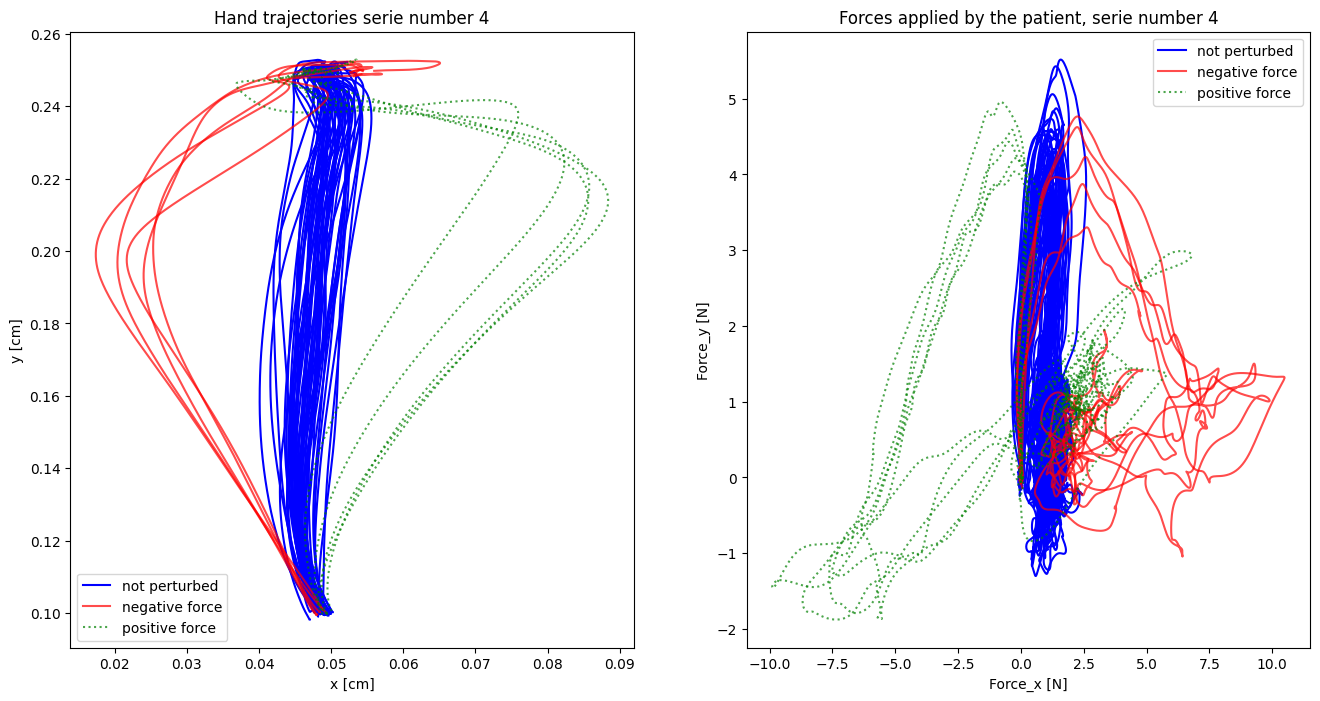

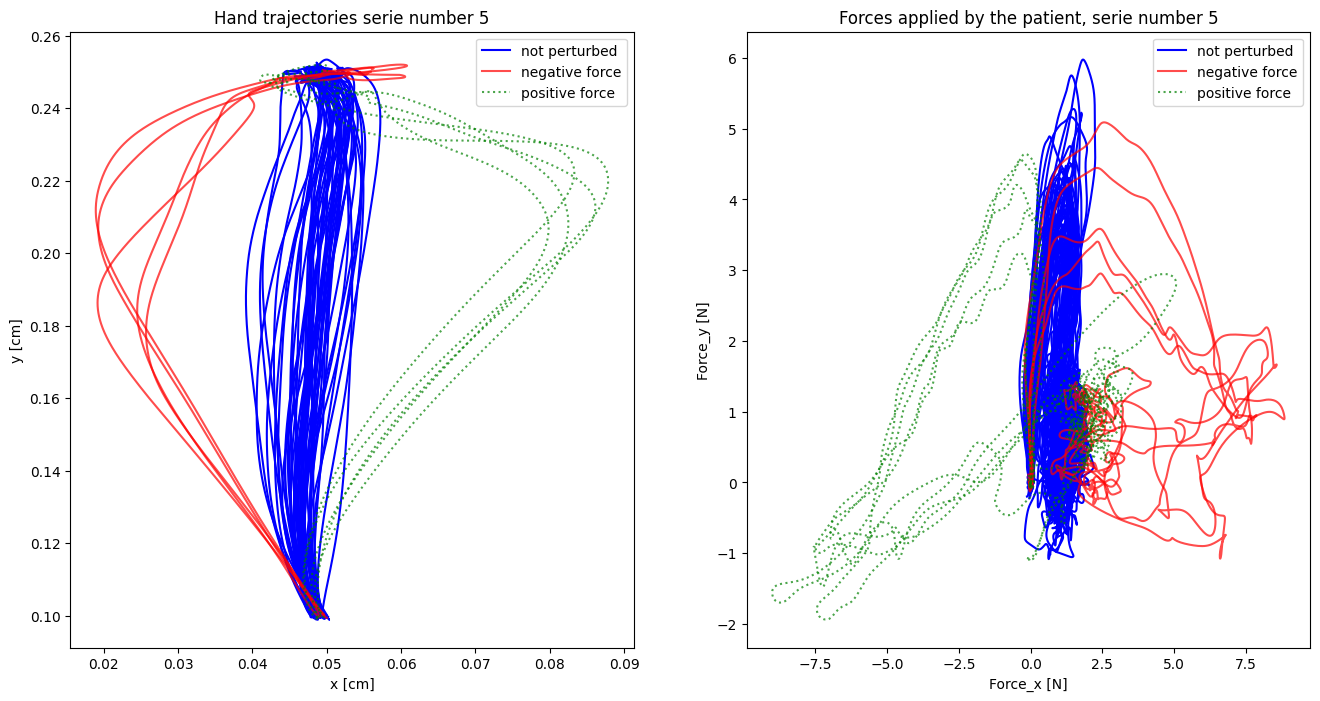

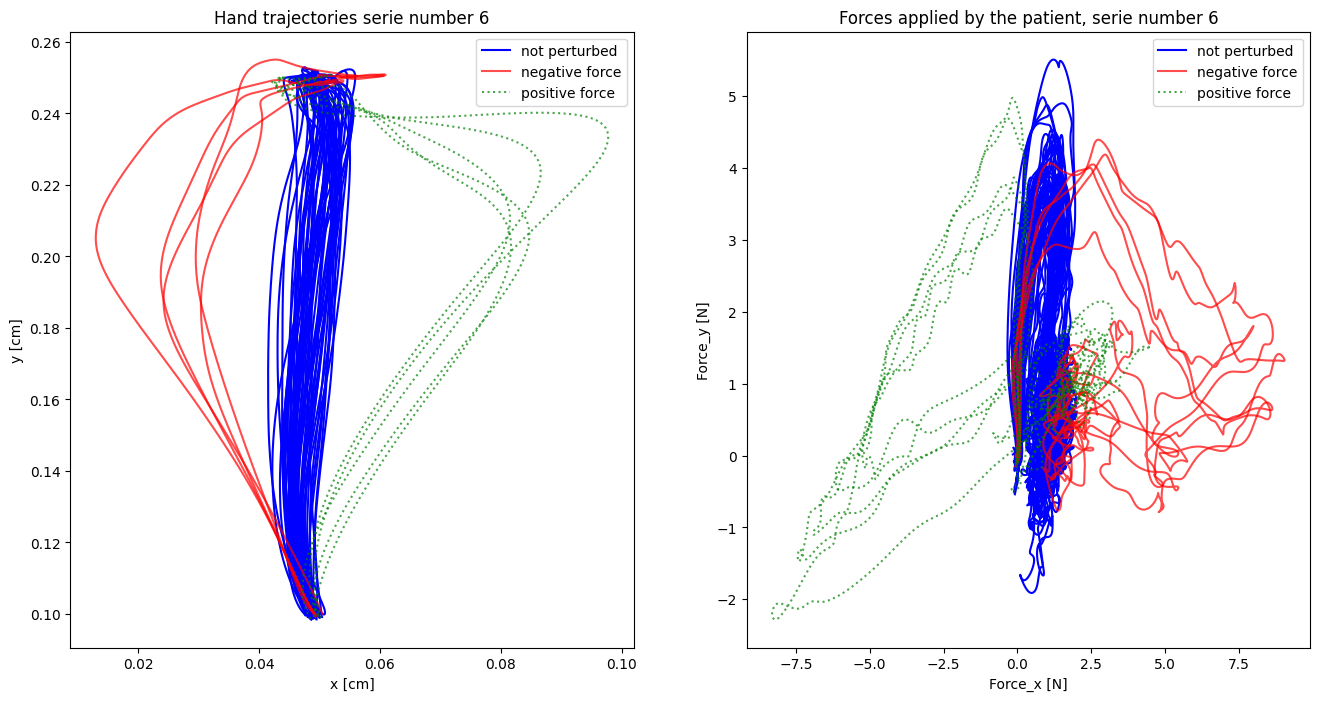

In [16]:
# Plot x and y coordinates from the dictMuscles with the forces applied by the patient:
x = dictMuscles['HandX']
y = dictMuscles['HandY']

force_x = dictMuscles['HandXForce']
force_y = dictMuscles['HandYForce']

descriptions = dictMuscles['descriptions']

extracted = dictMuscles['extracted']

print(force_y)
print(descriptions)
print(extracted)

print(len(x))
print('x rows: ', len(x[:,0]))
print('x columns: ', len(x[0,:]))

#print(dictMuscles['descriptions'][0])
#print(dictMuscles['extracted'][0])


for n_serie in range(0,len(x),60) :
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    count1 = 0
    count2 = 0
    count3 = 0
    for i in range(0,60) :
        if dictMuscles['extracted'][i+n_serie,2] == 1 :
            if count1 == 0 :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='b', label='not perturbed')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='b', label='not perturbed')
                count1 = 1
            else :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='b')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='b')
        if dictMuscles['extracted'][i+n_serie,2] == 2 :
            if count2 == 0 :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='r', alpha=0.7, label='negative force')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='r', alpha=0.7, label='negative force')
                count2 = 1
            else :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='r', alpha=0.7)
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='r', alpha=0.7)
        if dictMuscles['extracted'][i+n_serie,2] == 3 :
            if count3 == 0 :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted', label='positive force')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted', label='positive force')
                count3 = 1
            else :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted')

    axs[0].set_xlabel('x [cm]')
    axs[0].set_ylabel('y [cm]')
    axs[0].set_title('Hand trajectories serie number '+str(int(n_serie/60+1)))
    axs[0].legend()
    
    axs[1].set_xlabel('Force_x [N]')
    axs[1].set_ylabel('Force_y [N]')
    axs[1].set_title('Forces applied by the patient, serie number '+str(int(n_serie/60+1)))
    axs[1].legend()
    
    plt.show()

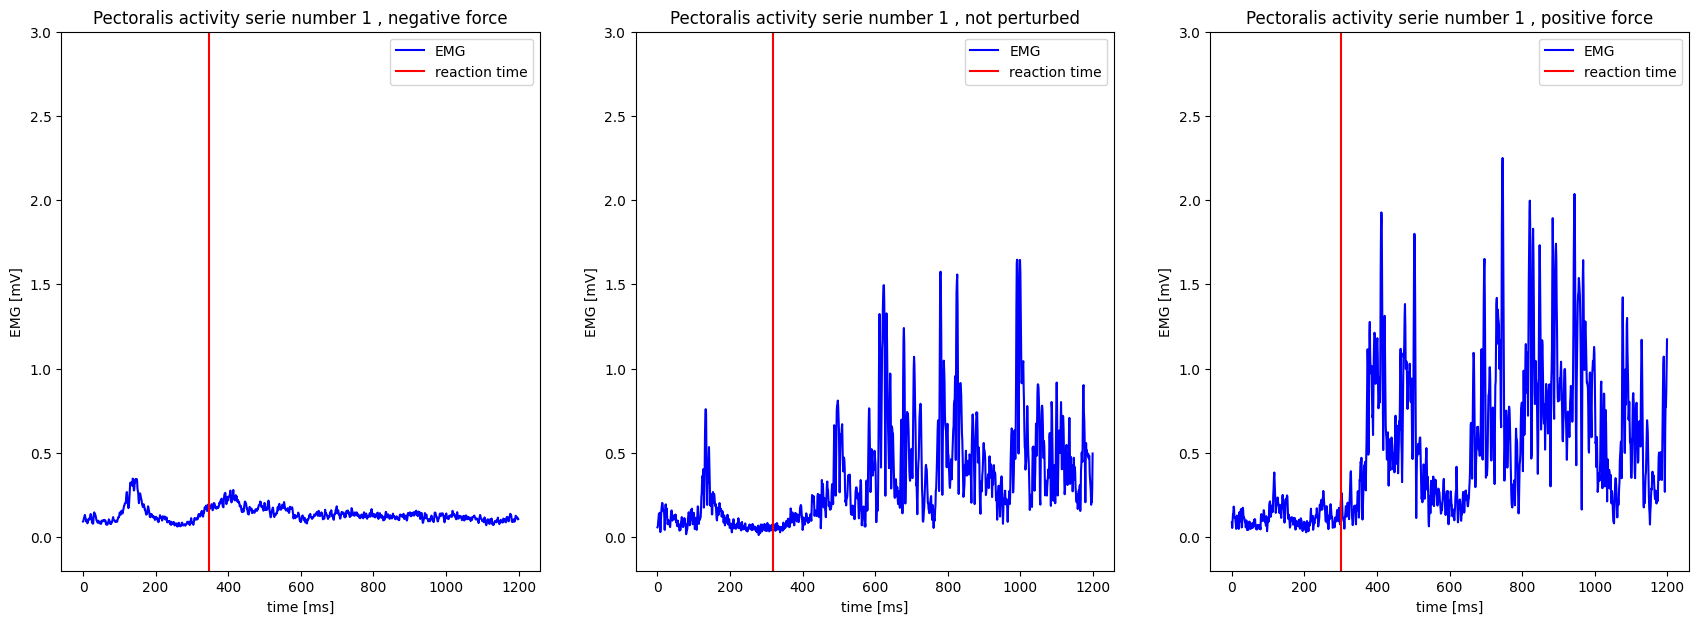

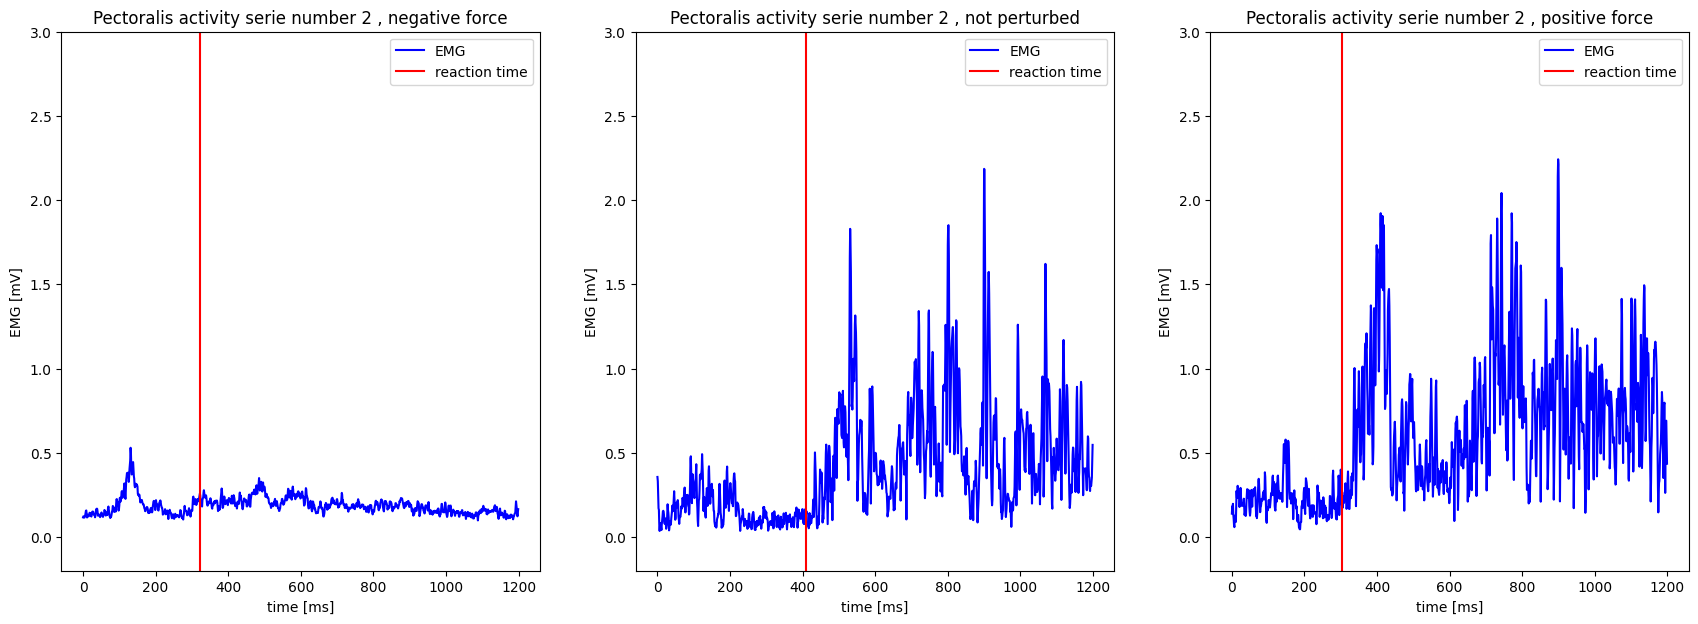

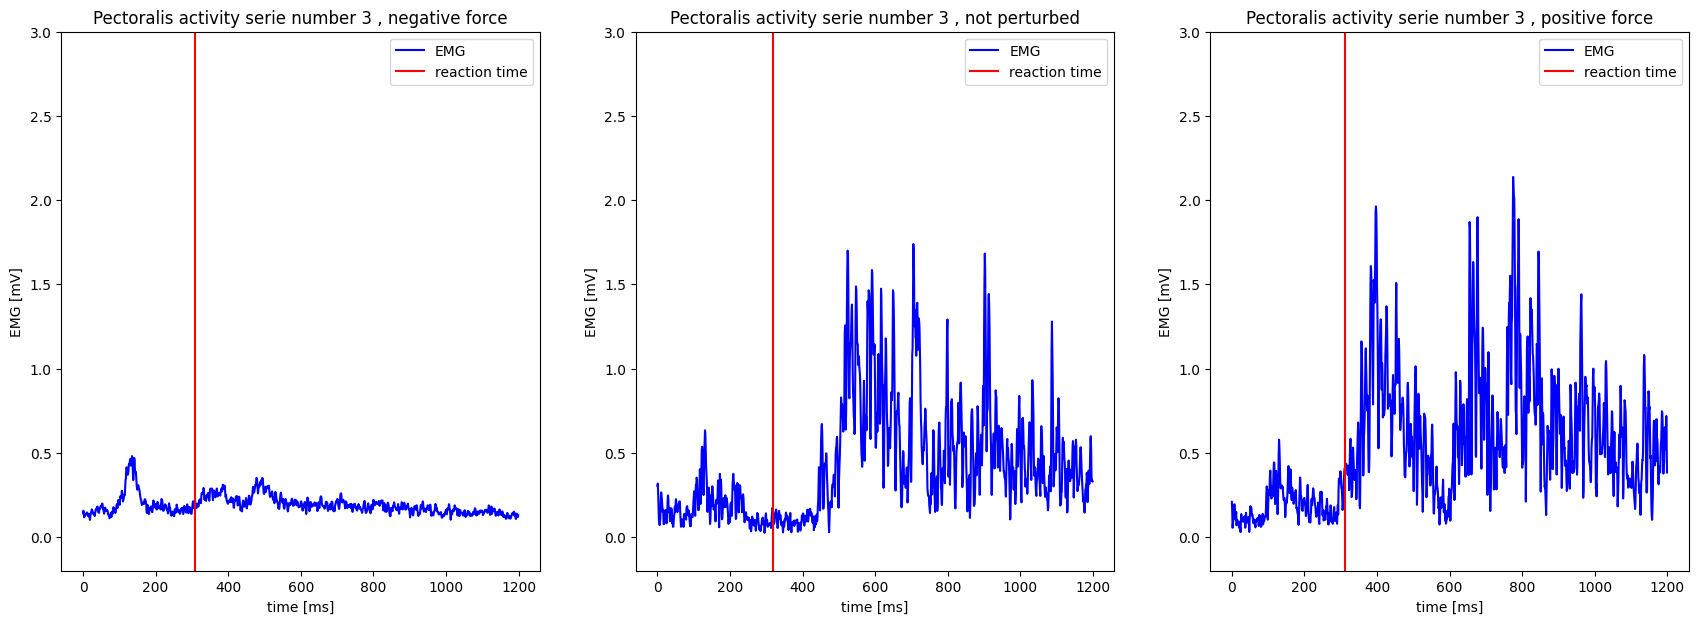

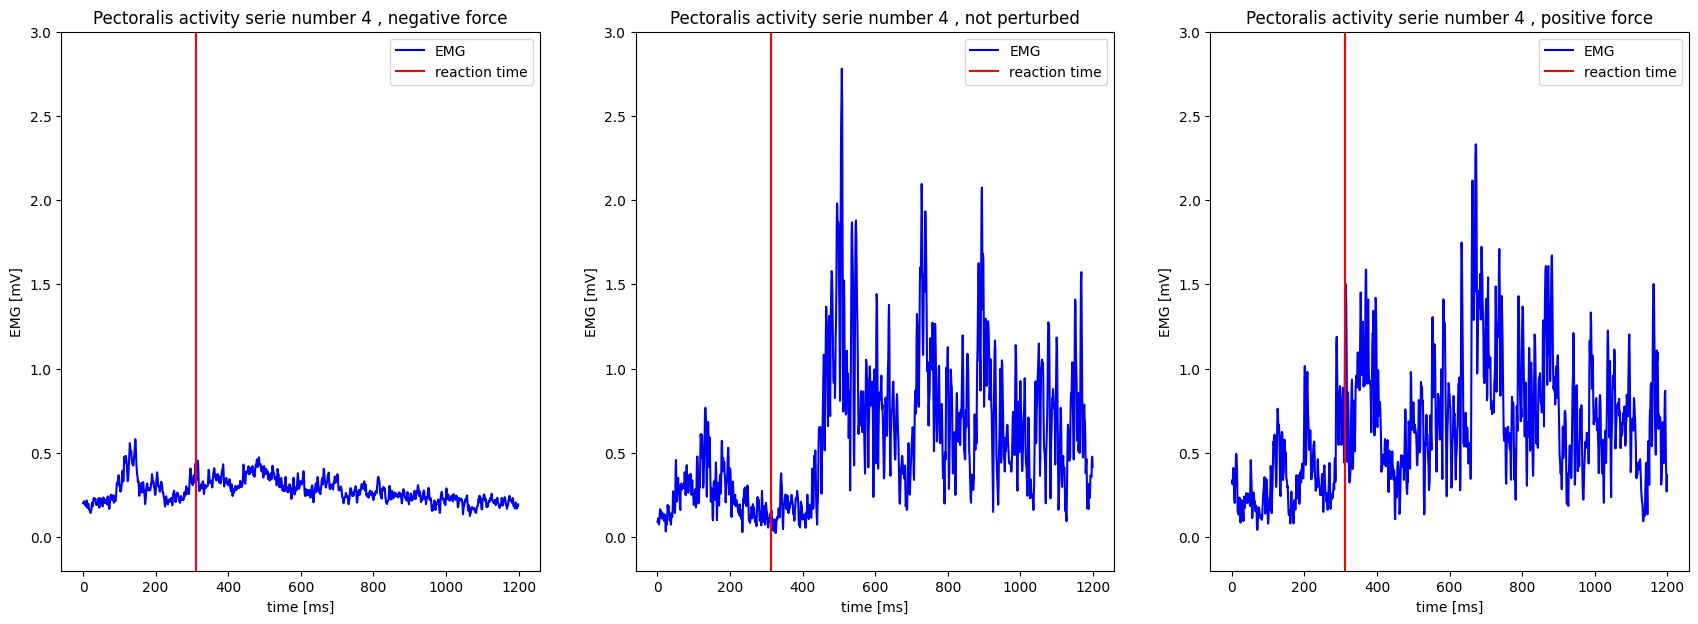

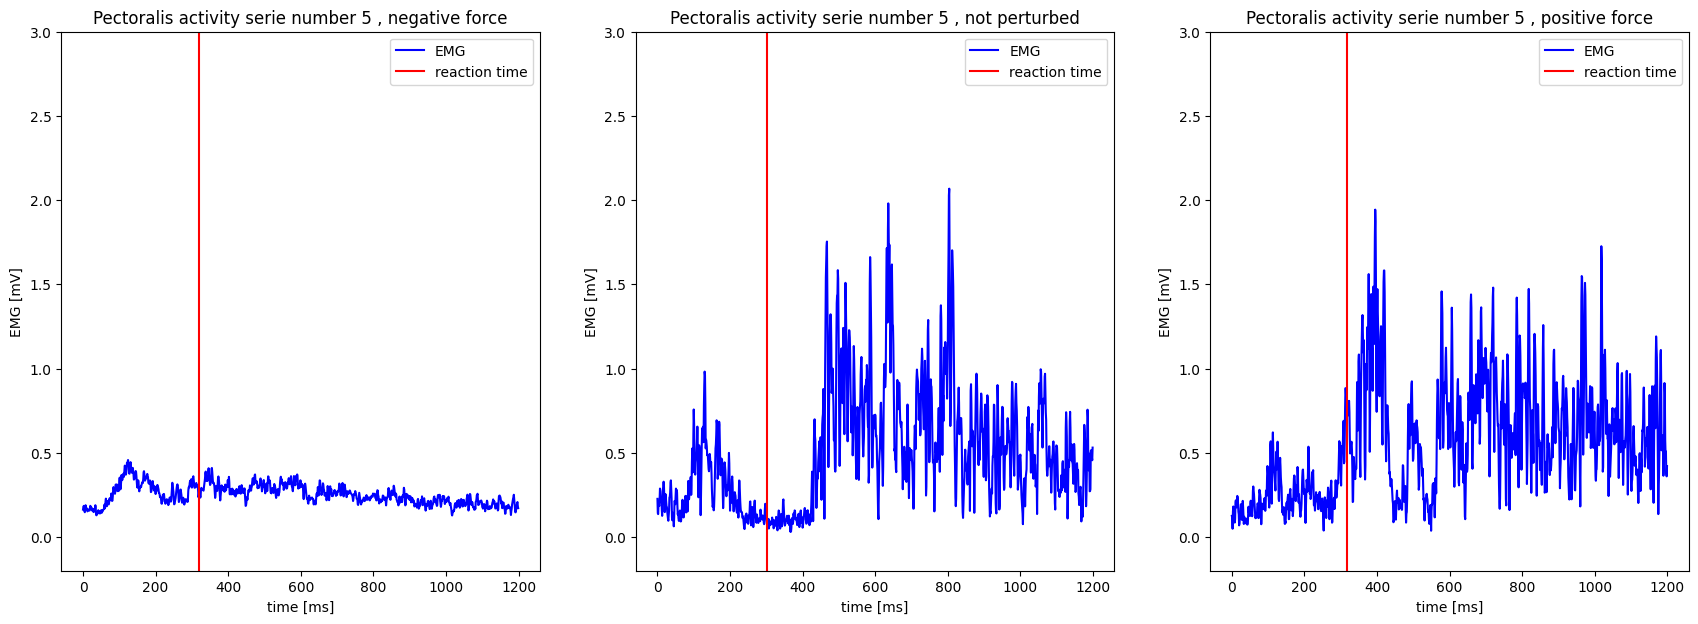

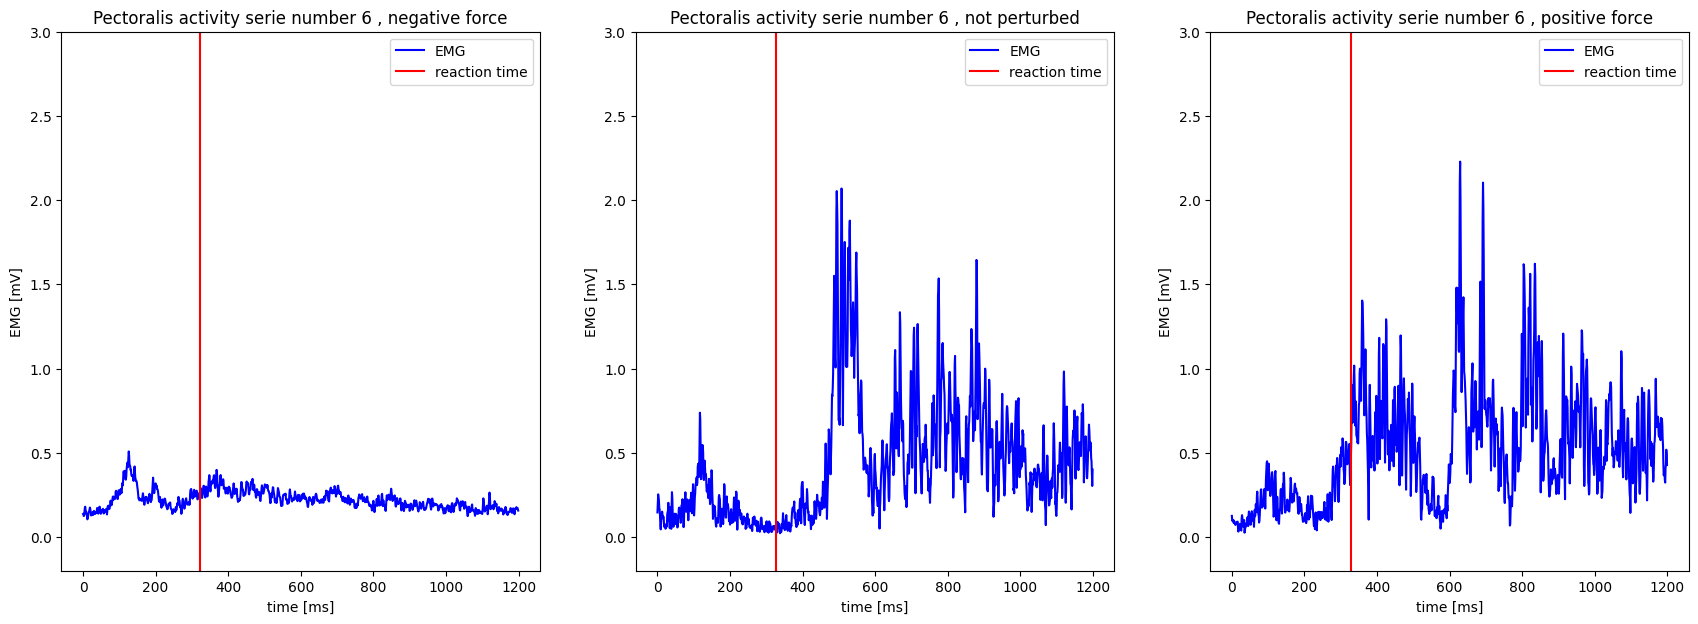

In [17]:
# Plot EMG with vert line for reaction time
extracted = dictMuscles['extracted']
pectoralis = dictMuscles['Pectoralis']
deltoid = dictMuscles['Deltoid']

for n_serie in range(0,len(x),60) :
    fig, axs = plt.subplots(1, 3, figsize=(21,7))

    pectoralis_not_perturbed = []
    pectoralis_neg_force = []
    pectoralis_pos_force = []
    
    rt_not_perturbed = []
    rt_neg_force = []
    rt_pos_force = []
    
    for i in range(0,60) :
        if extracted[i+n_serie,2] == 1 : # not perturbed
            pectoralis_not_perturbed.append(pectoralis[i+n_serie,:])   
            rt_not_perturbed.append(extracted[i+n_serie,-1])

        if extracted[i+n_serie,2] == 2 : # negative force
            pectoralis_neg_force.append(pectoralis[i+n_serie,:])   
            rt_neg_force.append(extracted[i+n_serie,-1])
            
        if extracted[i+n_serie,2] == 3 : # positive force
            pectoralis_pos_force.append(pectoralis[i+n_serie,:])   
            rt_pos_force.append(extracted[i+n_serie,-1])

    # Compute the mean
    avg_pectoralis_np = np.mean(pectoralis_not_perturbed, axis=0)
    avg_pectoralis_nf = np.mean(pectoralis_neg_force, axis=0)
    avg_pectoralis_pf = np.mean(pectoralis_pos_force, axis=0)
    
    avg_rt_np = np.mean(rt_not_perturbed, axis=0)
    avg_rt_nf = np.mean(rt_neg_force, axis=0)
    avg_rt_pf = np.mean(rt_pos_force, axis=0)
    
    axs[0].plot(avg_pectoralis_np, color='b', label='EMG')
    axs[0].axvline(avg_rt_np, color='r', label='reaction time')
    axs[0].set_xlabel('time [ms]')
    axs[0].set_ylabel('EMG [mV]')
    axs[0].set_title('Pectoralis activity serie number '+str(int(n_serie/60+1))+' , negative force')
    axs[0].set_ylim([-0.2,3])
    axs[0].legend()
    
    axs[1].plot(avg_pectoralis_nf, color='b', label='EMG')
    axs[1].axvline(avg_rt_nf, color='r', label='reaction time')
    axs[1].set_xlabel('time [ms]')
    axs[1].set_ylabel('EMG [mV]')
    axs[1].set_title('Pectoralis activity serie number '+str(int(n_serie/60+1))+' , not perturbed')
    axs[1].set_ylim([-0.2,3])
    axs[1].legend()
    
    axs[2].plot(avg_pectoralis_pf, color='b', label='EMG')
    axs[2].axvline(avg_rt_pf, color='r', label='reaction time')
    axs[2].set_xlabel('time [ms]')
    axs[2].set_ylabel('EMG [mV]')
    axs[2].set_title('Pectoralis activity serie number '+str(int(n_serie/60+1))+' , positive force')
    axs[2].set_ylim([-0.2,3])
    axs[2].legend()
    
    plt.show()


Text(0.5, 1.0, 'Comparison hand y velocity and forces - one movement')

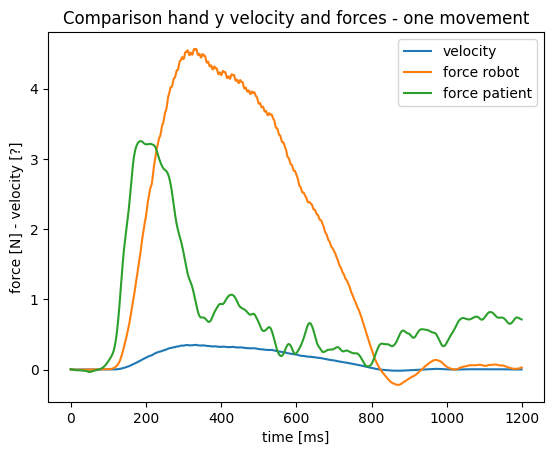

In [18]:
# Fx = ±13*y_dot <- applied by the robot

# Computation of Fx
vel_y = dictMuscles['HandYVel']
Fx = 13*vel_y

# First trial
plt.plot(vel_y[0,:], label='velocity')
plt.plot(Fx[0,:], label='force robot')
plt.plot(force_y[0,:], label='force patient')
plt.legend()
plt.xlabel('time [ms]')
plt.ylabel('force [N] - velocity [?]')
plt.title('Comparison hand y velocity and forces - one movement')